# EDA Air quality 

In [1]:
# import packages
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')


In [2]:
# import data
data = pd.read_csv('data/data_prep_reg.csv', index_col=[0])
data.head(2)

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,Bi_airquality,trafic_airquality,6fold_airquality
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333,bad,yellow,med unhealthy
10,3,55.638261,34.041667,17.191667,23.189507,4.432786,19.649595,22.033333,16.850000,10.302,...,90.986667,90.211667,90.624814,0.179998,0.032399,90.641667,0.775000,bad,yellow,med unhealthy


In [3]:
# name of columns
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
max_features = ["max_" + str(feat) for feat in features]
min_features = ["min_" + str(feat) for feat in features]
mean_features = ["mean_" + str(feat) for feat in features]
std_features = ["std_" + str(feat) for feat in features]
var_features = ["vat_" + str(feat) for feat in features]
median_features = ["median_" + str(feat) for feat in features]
ptp_features = ["ptp_" + str(feat) for feat in features]


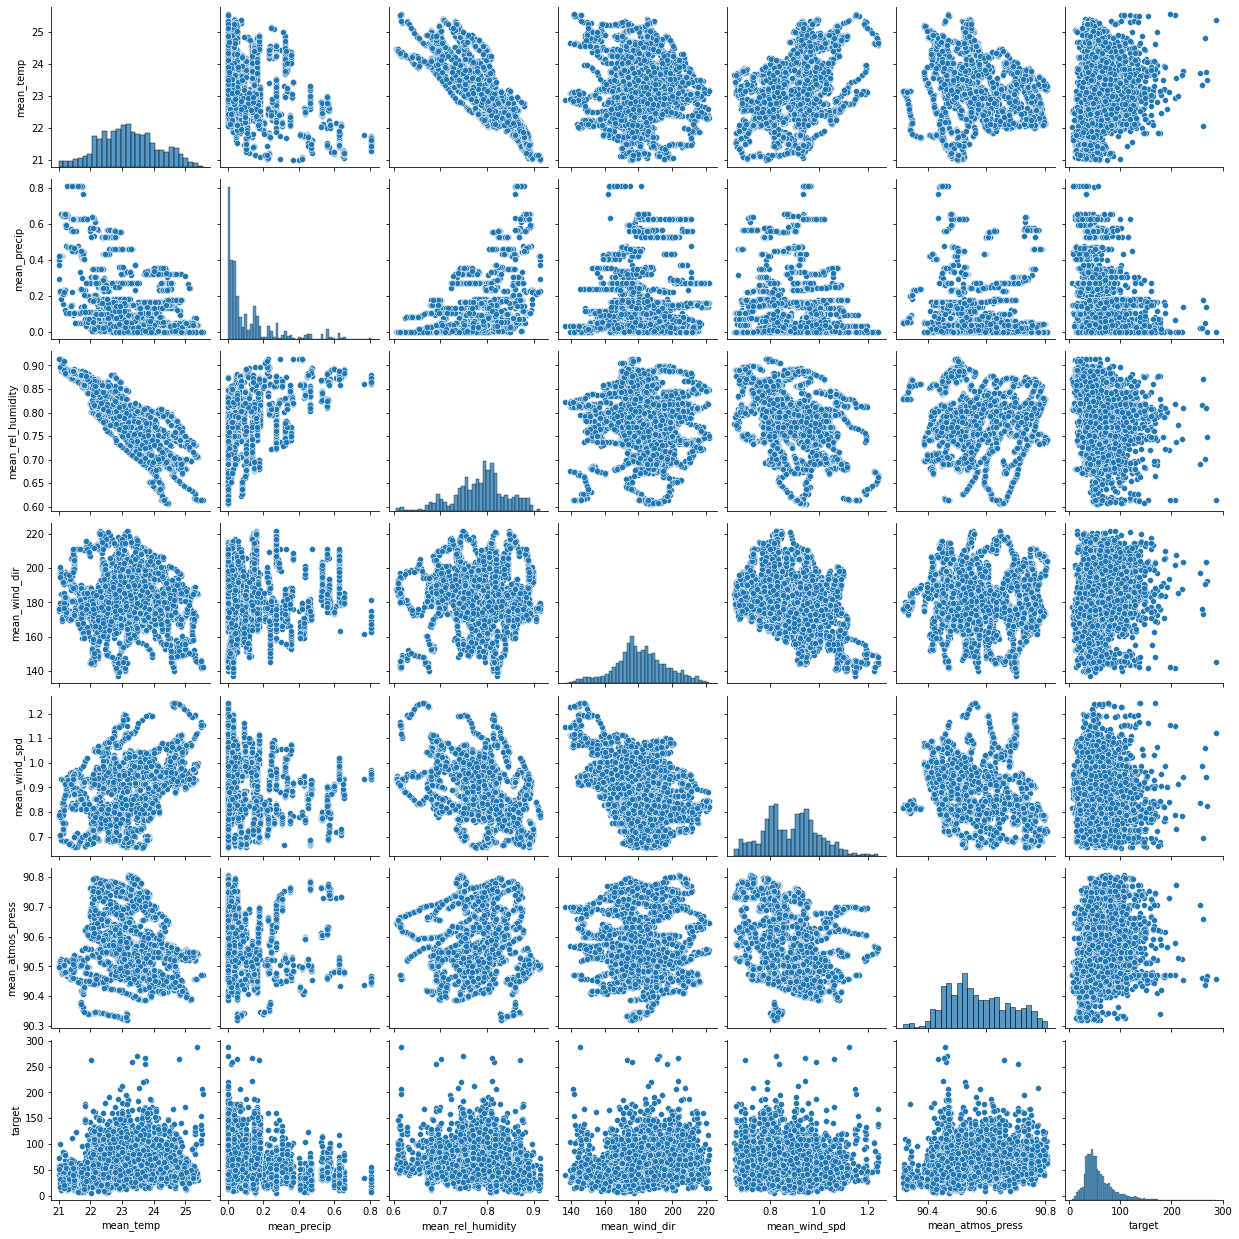

In [4]:
mean_features.append('target')
sns.pairplot(data[mean_features])


<AxesSubplot:xlabel='target', ylabel='Count'>

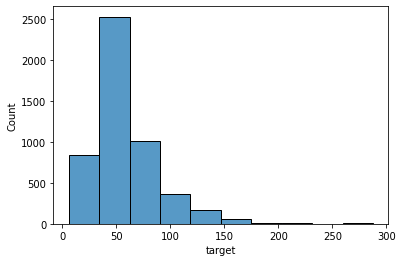

In [5]:
# overview of the target 
sns.histplot(data.target, bins=10)  # TODO bins passend zu der Klassifizierung



#### EDA on precipitation

In [6]:
# EDA precipitation:
precip_stats = pd.concat([data.max_precip, 
                        data.min_precip, 
                        data.mean_precip, 
                        data.std_precip, 
                        data.var_precip, 
                        data.median_precip,  # all 0,0
                        data.ptp_precip],
                        axis=1)
precip_stats['r_std_precip'] = precip_stats['std_precip'] / precip_stats['mean_precip'] *100
#data['sum_precip'] = data['precip'].apply(lambda x: np.sum(x))

<AxesSubplot:xlabel='mean_precip', ylabel='target'>

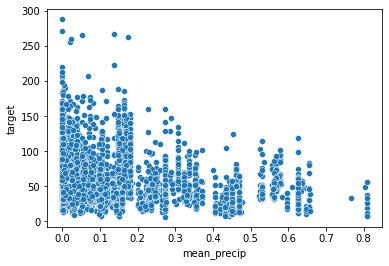

In [7]:
sns.scatterplot(data=data, x='mean_precip', y='target')

In [8]:
precip_stats.median_precip.unique() #median values are all 0, why?

array([0.])

<AxesSubplot:xlabel='mean_precip', ylabel='Count'>

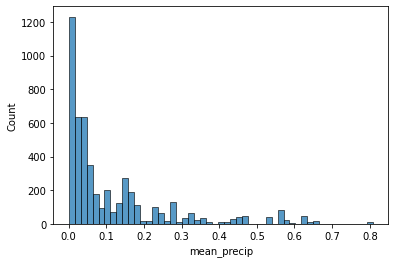

In [9]:
sns.histplot(precip_stats.mean_precip) # a lot of mean values == 0, when it doesnt rain

In [10]:
precip_stats.r_std_precip.sort_values(ascending=False)[:3]

9847    1095.445115
9881    1095.445115
1891    1095.445115
Name: r_std_precip, dtype: float64

In [11]:
precip_stats.values[3]

array([1.35880000e+01, 0.00000000e+00, 1.69471074e-01, 1.31093175e+00,
       1.71854205e+00, 0.00000000e+00, 1.35880000e+01, 7.73543069e+02])

The relative standard deviation is less than 15%, it should be ok

#### EDA on humidity 

In [12]:
# EDA humidity:
rel_hum_stats = pd.concat([data.max_rel_humidity, 
                        data.min_rel_humidity, 
                        data.mean_rel_humidity, 
                        data.std_rel_humidity, 
                        data.var_rel_humidity, 
                        data.median_rel_humidity,  # all 0
                        data.ptp_rel_humidity],
                        axis=1)
rel_hum_stats['r_std_rel_humidity'] = rel_hum_stats['std_rel_humidity'] / rel_hum_stats['mean_rel_humidity'] * 100


<AxesSubplot:xlabel='mean_rel_humidity', ylabel='Count'>

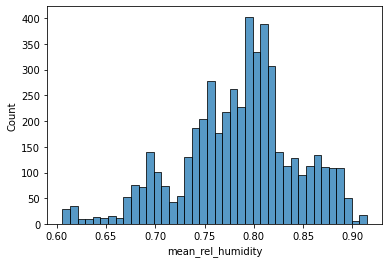

In [13]:
sns.histplot(rel_hum_stats.mean_rel_humidity) # a lot of mean values == 0, when it doesnt rain

<AxesSubplot:xlabel='r_std_rel_humidity', ylabel='Count'>

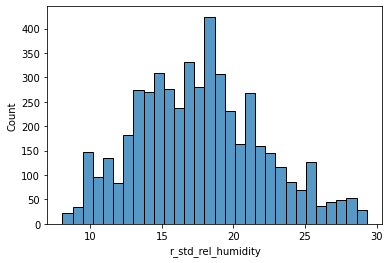

In [14]:
# relative Standard deviation of the precipitation
sns.histplot(rel_hum_stats.r_std_rel_humidity)

### EDA on wind speed

In [15]:
# EDA wind speed on metres per second:
wind_spd_stats = pd.concat([data.max_wind_spd, 
                        data.min_wind_spd, 
                        data.mean_wind_spd, 
                        data.std_wind_spd, 
                        data.var_wind_spd, 
                        data.median_wind_spd,  # all 0
                        data.ptp_wind_spd],
                        axis=1)
wind_spd_stats['r_std_wind_spd'] = wind_spd_stats['std_wind_spd'] / wind_spd_stats['mean_wind_spd'] * 100

<AxesSubplot:xlabel='mean_wind_spd', ylabel='Count'>

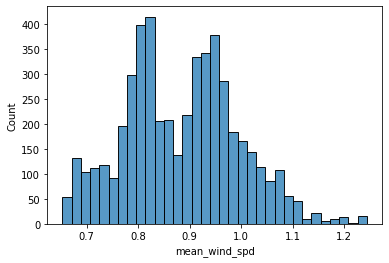

In [16]:
sns.histplot(wind_spd_stats.mean_wind_spd) # 5m/2 means Beafourt 3 -> leichte brise

<AxesSubplot:xlabel='r_std_wind_spd', ylabel='Count'>

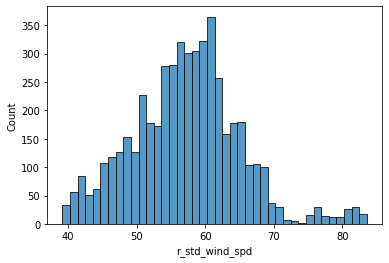

In [17]:
sns.histplot(wind_spd_stats.r_std_wind_spd)

#### atmos_press: mean atmospheric pressure(atm)*

[(87.5, 91.0)]

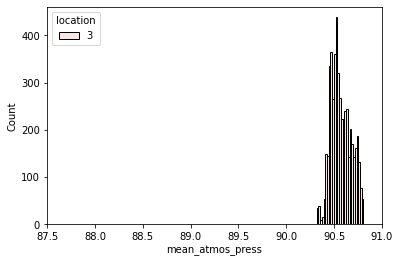

In [18]:
p = sns.histplot(data=data , x = 'mean_atmos_press', hue='location')
p.set(xlim=(87.5, 91))


![](pictures/location_atmps_press.png)

mean_atmos_press depends on the location. 
?needs to level?

In [19]:
del data

on data process